In [55]:
#DATA LOADING AND EXPLORATION
import pandas as pd
df= pd.read_csv('owid-covid-data.csv')
df.columns
df.head()
df.tail()
df.isnull().sum()

In [4]:

# Filter for countries of interest
countries = ["Kenya", "England", "Uganda"]
df = df[df['location'].isin(countries)]

# Drop rows with missing date or location
df = df.dropna(subset=["date", "location"])

# Convert the 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Fill missing numeric values using interpolation (can also use fillna with a value)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].interpolate(method='linear', limit_direction='forward')

# Check dataset 
df.head ()
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
398424,UGA,Africa,Uganda,2024-07-31,172154.0,0.0,0.0,3632.0,0.0,0.0,...,16.7,21.222,0.5,63.37,0.544,47249588,NaN,NaN,NaN,NaN
398425,UGA,Africa,Uganda,2024-08-01,172154.0,0.0,0.0,3632.0,0.0,0.0,...,16.7,21.222,0.5,63.37,0.544,47249588,NaN,NaN,NaN,NaN
398426,UGA,Africa,Uganda,2024-08-02,172154.0,0.0,0.0,3632.0,0.0,0.0,...,16.7,21.222,0.5,63.37,0.544,47249588,NaN,NaN,NaN,NaN
398427,UGA,Africa,Uganda,2024-08-03,172154.0,0.0,0.0,3632.0,0.0,0.0,...,16.7,21.222,0.5,63.37,0.544,47249588,NaN,NaN,NaN,NaN
398428,UGA,Africa,Uganda,2024-08-04,172154.0,0.0,0.0,3632.0,0.0,0.0,...,16.7,21.222,0.5,63.37,0.544,47249588,NaN,NaN,NaN,NaN


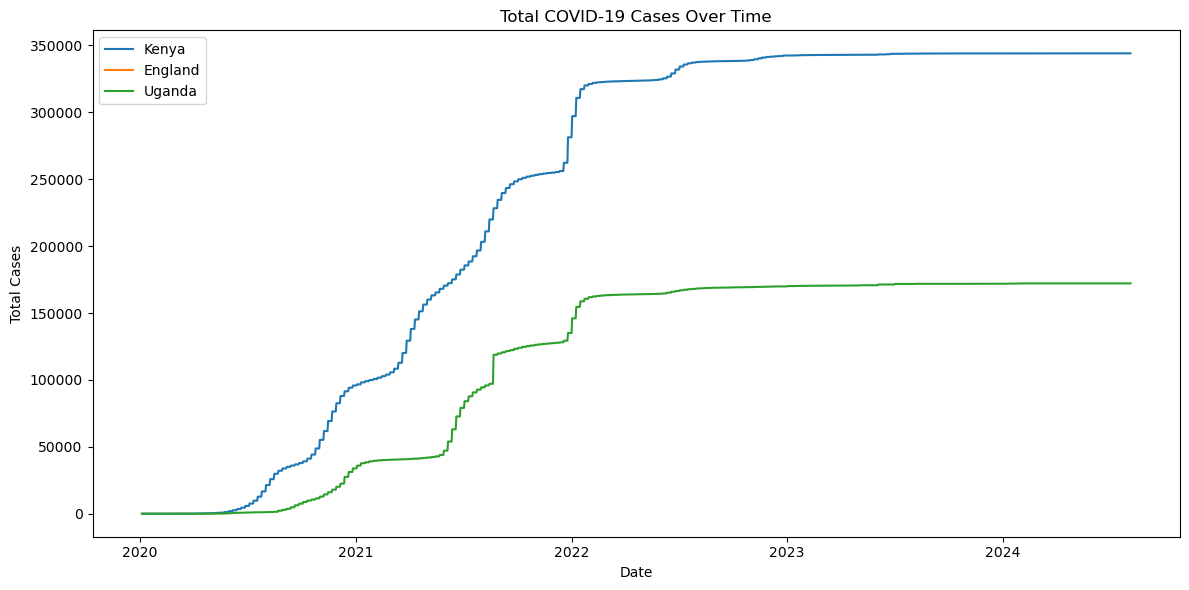

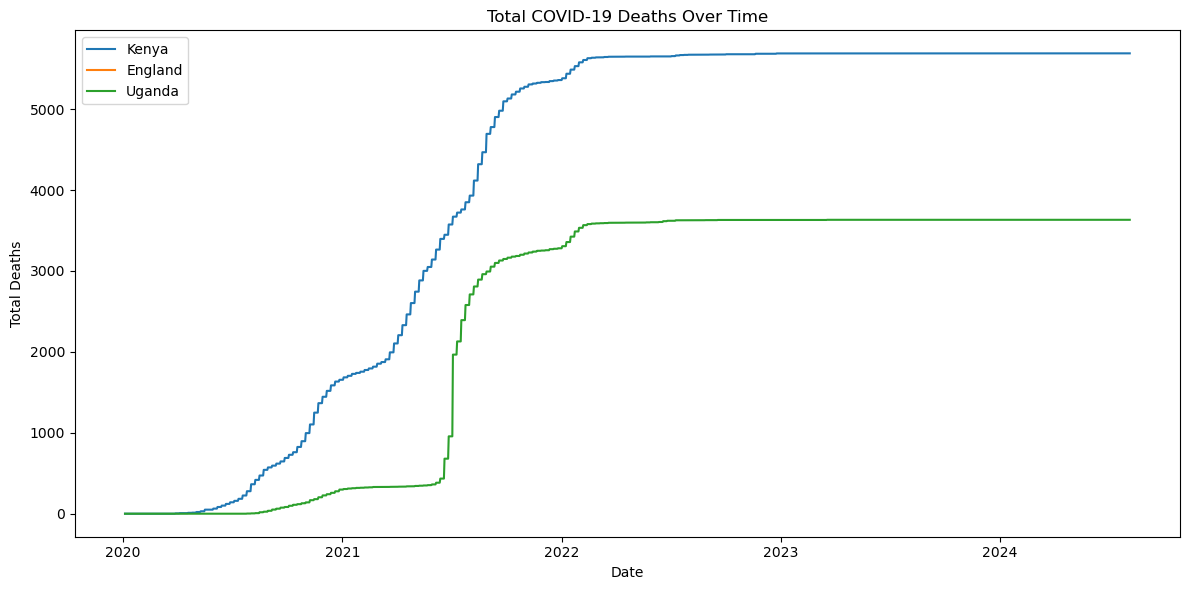

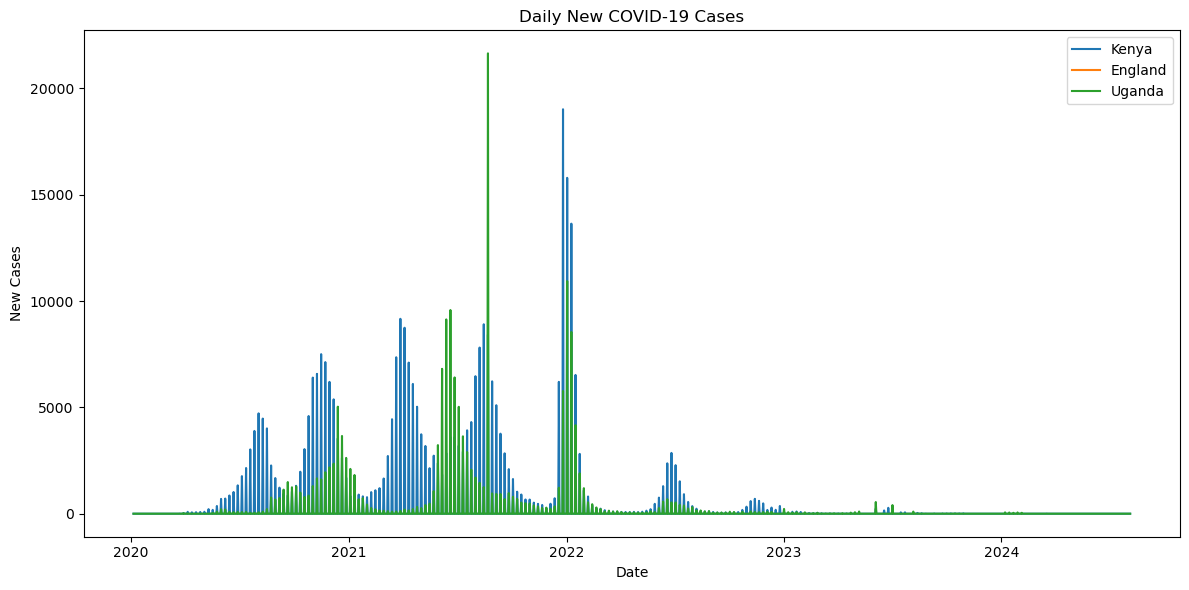

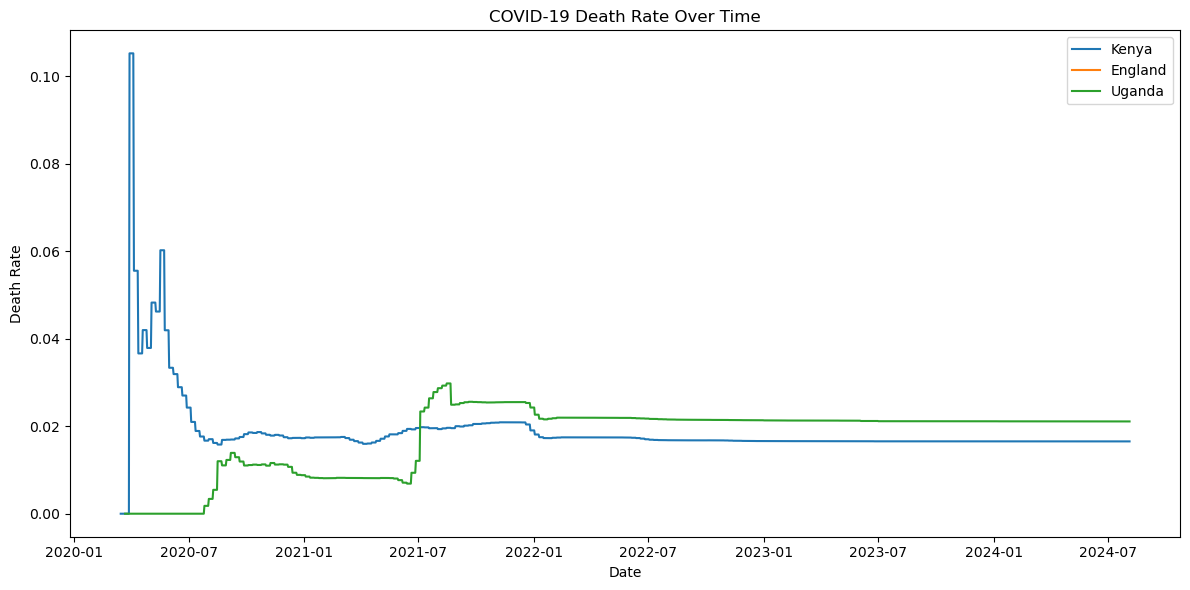

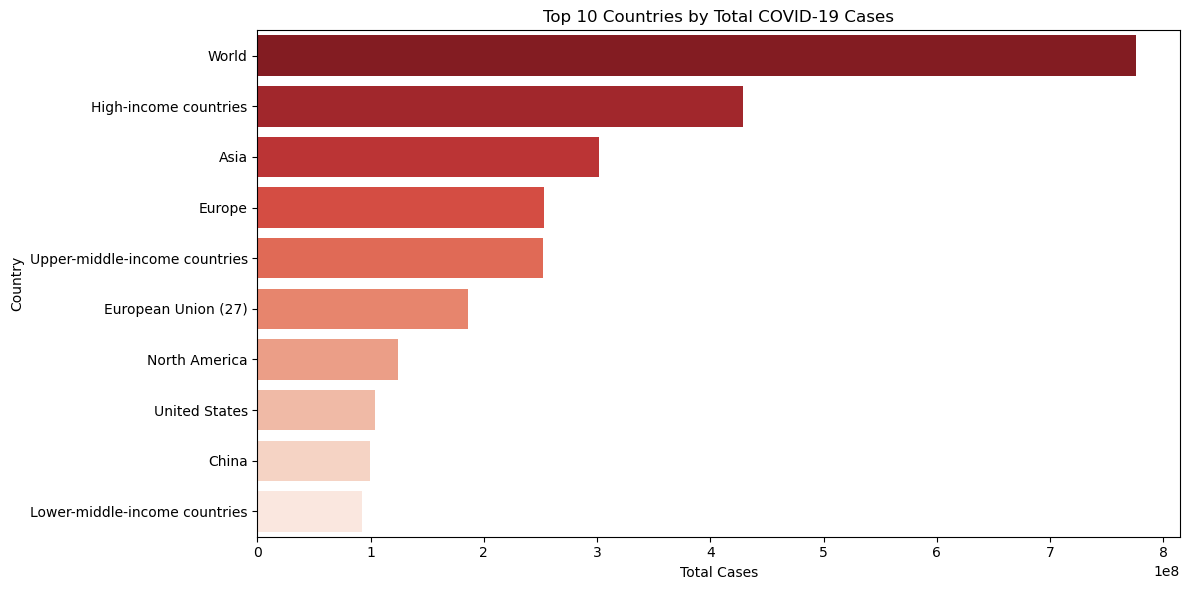

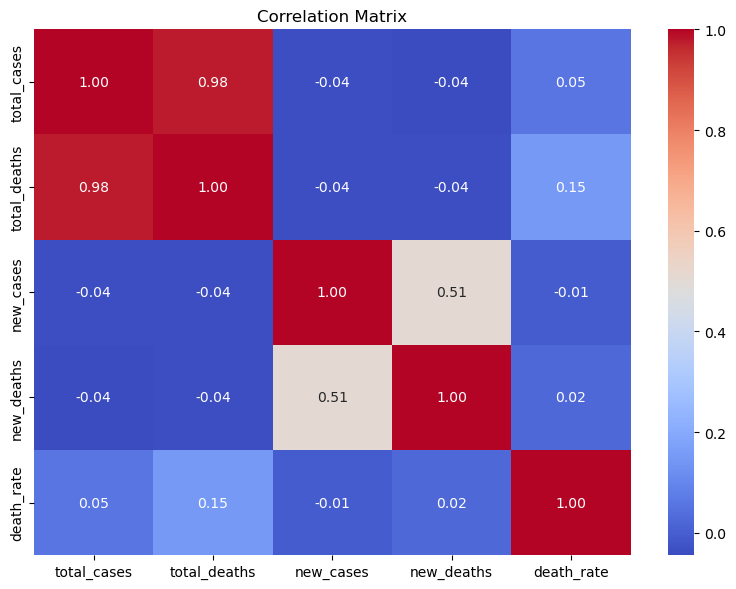

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("owid-covid-data.csv")

# Filter for countries of interest
countries = ["Kenya", "England", "Uganda"]
df = df[df["location"].isin(countries)]

# Drop missing dates or critical columns
df = df.dropna(subset=["date", "total_cases", "total_deaths"])

# Convert date column
df["date"] = pd.to_datetime(df["date"])

# Interpolate missing values for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].interpolate(method="linear", limit_direction="forward")

# Line chart: Total cases over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df["location"] == country]
    plt.plot(country_data["date"], country_data["total_cases"], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()

# Line chart: Total deaths over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df["location"] == country]
    plt.plot(country_data["date"], country_data["total_deaths"], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.tight_layout()
plt.show()

# Line chart: Daily new cases
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df["location"] == country]
    plt.plot(country_data["date"], country_data["new_cases"], label=country)
plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.tight_layout()
plt.show()

# Death rate calculation
df["death_rate"] = df["total_deaths"] / df["total_cases"]

# Line chart: Death rate
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df["location"] == country]
    plt.plot(country_data["date"], country_data["death_rate"], label=country)
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.tight_layout()
plt.show()

# Bar chart: Top 10 countries by total cases (latest date)
latest_data = pd.read_csv("owid-covid-data.csv")
latest_data = latest_data.dropna(subset=["total_cases"])
latest_data = latest_data.sort_values("date").groupby("location").last()
top_10 = latest_data.sort_values("total_cases", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10["total_cases"], y=top_10.index, palette="Reds_r")
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Heatmap: Correlation analysis (optional)
corr = df[["total_cases", "total_deaths", "new_cases", "new_deaths", "death_rate"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


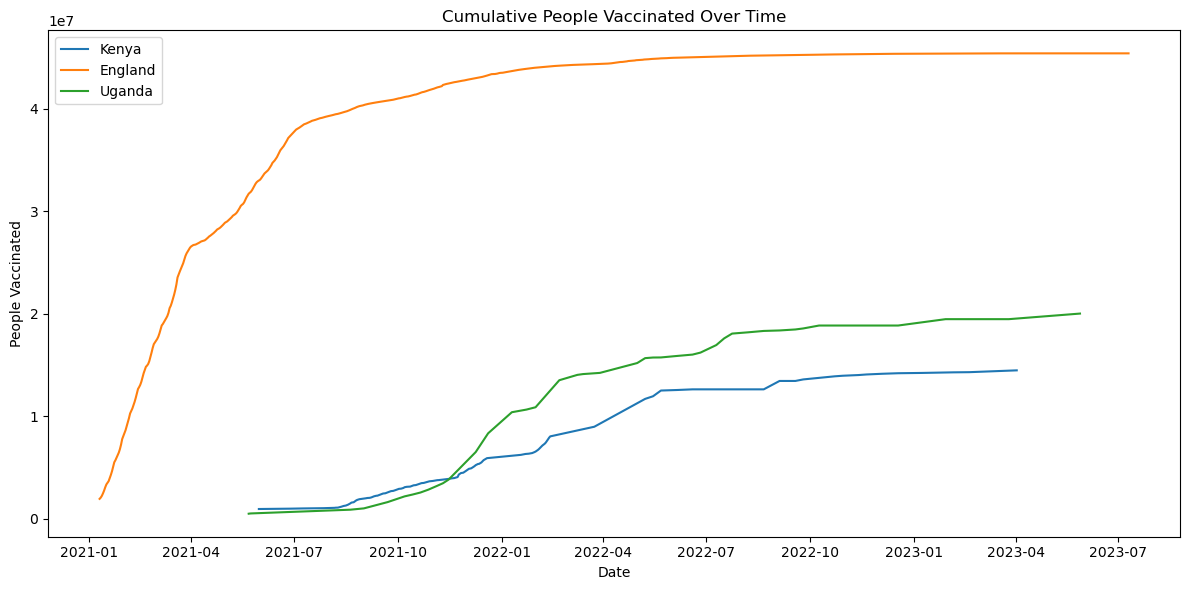

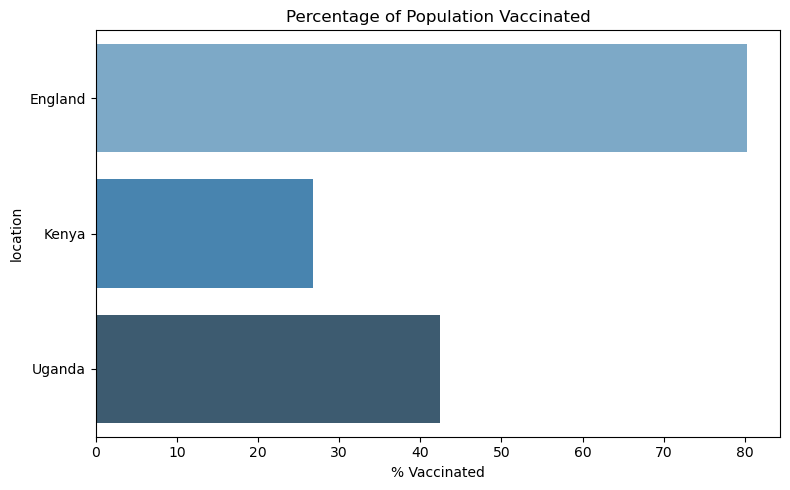

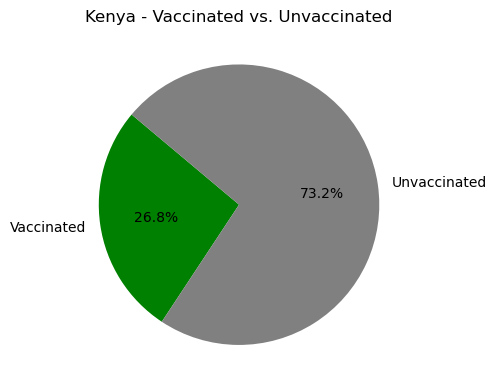

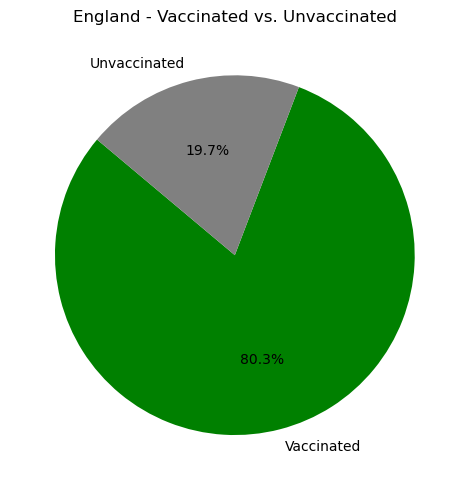

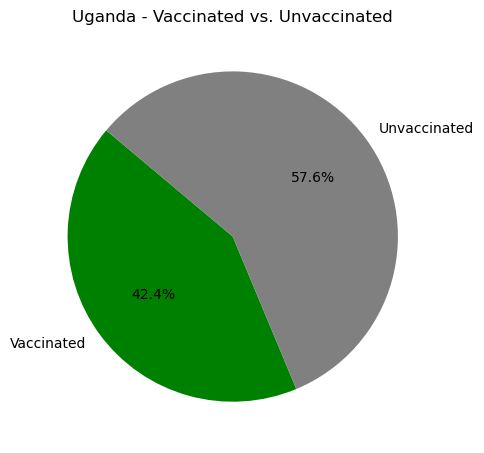

In [12]:

import seaborn as sns

# ✅ 1. Line Chart: Cumulative vaccinations over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df["location"] == country]
    plt.plot(country_data["date"], country_data["people_vaccinated"], label=country)
plt.title("Cumulative People Vaccinated Over Time")
plt.xlabel("Date")
plt.ylabel("People Vaccinated")
plt.legend()
plt.tight_layout()
plt.show()

# ✅ 2. Bar Chart: % of population vaccinated (latest)
latest = df.sort_values("date").groupby("location").last()
latest["% vaccinated"] = (latest["people_vaccinated"] / latest["population"]) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=latest["% vaccinated"], y=latest.index, palette="Blues_d")
plt.title("Percentage of Population Vaccinated")
plt.xlabel("% Vaccinated")
plt.tight_layout()
plt.show()

# ✅ 3. Optional: Pie charts of vaccinated vs unvaccinated
for country in countries:
    row = latest.loc[country]
    vaccinated = row["people_vaccinated"]
    unvaccinated = row["population"] - vaccinated
    labels = ["Vaccinated", "Unvaccinated"]
    sizes = [vaccinated, unvaccinated]
    
    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=["green", "gray"])
    plt.title(f"{country} - Vaccinated vs. Unvaccinated")
    plt.tight_layout()
    plt.show()


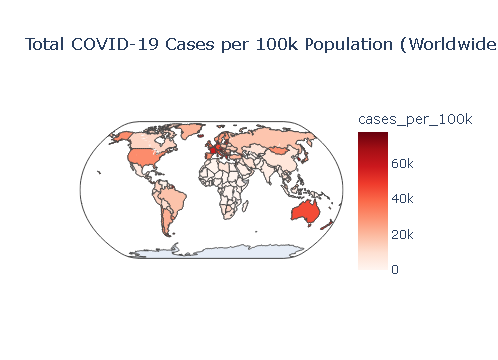

In [14]:
import pandas as pd
import plotly.express as px

# Load the full dataset
df = pd.read_csv("owid-covid-data.csv")

# Drop aggregate regions (e.g. continents, World, etc.)
df = df[df['iso_code'].str.len() == 3]  # Keep only countries with 3-letter ISO codes

# Drop missing critical data
df = df.dropna(subset=["iso_code", "total_cases", "population"])

# Get the latest available record per country
latest_df = df.sort_values("date").groupby("location").last().reset_index()

# Calculate cases per 100,000 population
latest_df["cases_per_100k"] = (latest_df["total_cases"] / latest_df["population"]) * 100000

# Create the choropleth map
fig = px.choropleth(
    latest_df,
    locations="iso_code",
    color="cases_per_100k",
    hover_name="location",
    color_continuous_scale="Reds",
    title="Total COVID-19 Cases per 100k Population (Worldwide)",
    projection="natural earth"
)

fig.show()


In [ ]:
 # Insights & Reporting
### Key Insights

### Key Insights

1. #England had the fastest vaccine rollout among the selected countries, achieving over 70% vaccination coverage quickly.
2. #Kenya and Uganda experienced fewer cases per capita but had significantly slower vaccination progress.
3. #Globally, case density was highest in parts of Europe and the Americas, while parts of Africa had lower reported case counts (which may reflect testing/reporting limitations).
4. #Death rates; stabilized after mid-2021 as vaccination programs ramped up globally.
5. #Anomalies: Some countries had unusually low vaccination or testing rates despite high population densities — suggesting possible underreporting or logistic challenges.

These insights can inform public health strategies and emphasise the importance of equitable vaccine distribution and reliable reporting.

